<a href="https://colab.research.google.com/github/divyani95/AVAADA-PROJECT/blob/main/Waste_Segregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow matplotlib scikit-learn Pillow

1. Upload and Extract Dataset

In [3]:
from google.colab import files
import zipfile
import os

# Upload dataset ZIP
uploaded = files.upload()

# Extract the zip file
for file in uploaded.keys():
    if file.endswith('.zip'):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall('dataset')

print("Dataset extracted successfully!")


Saving data.zip to data.zip
Dataset extracted successfully!


2. Load Images and Labels

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

# Set base directory
base_dir = "dataset/data"
categories = os.listdir(base_dir)
print("Categories:", categories)

# Load and resize images
IMG_SIZE = (128, 128)

def load_images_labels(directory):
    images = []
    labels = []
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                try:
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize(IMG_SIZE)
                    images.append(np.array(img))
                    labels.append(category)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

X, y = load_images_labels(base_dir)
print(f"Total images loaded: {len(X)}")


Categories: ['Food_Waste', 'Other', 'Plastic', 'Metal', 'Paper', 'Cardboard', 'Glass']
Total images loaded: 7625


3. Visualize Dataset

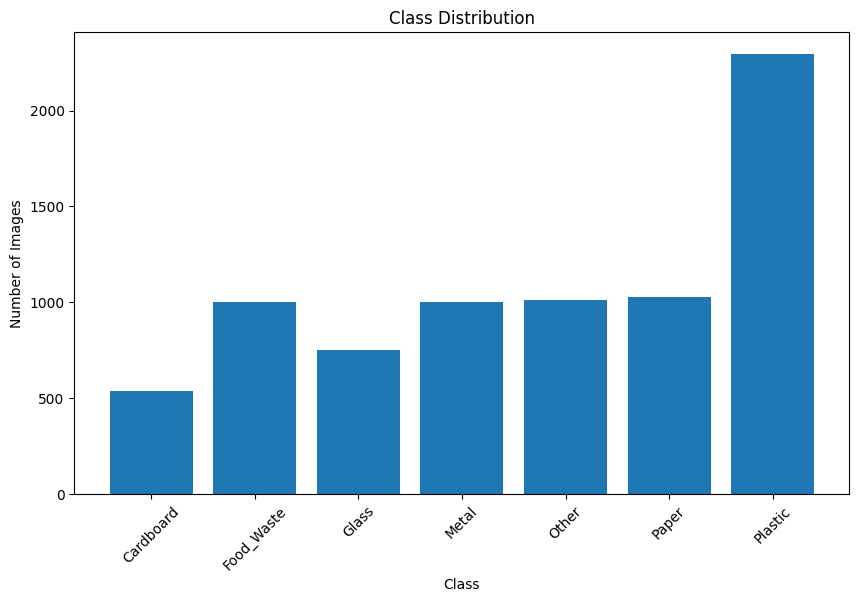

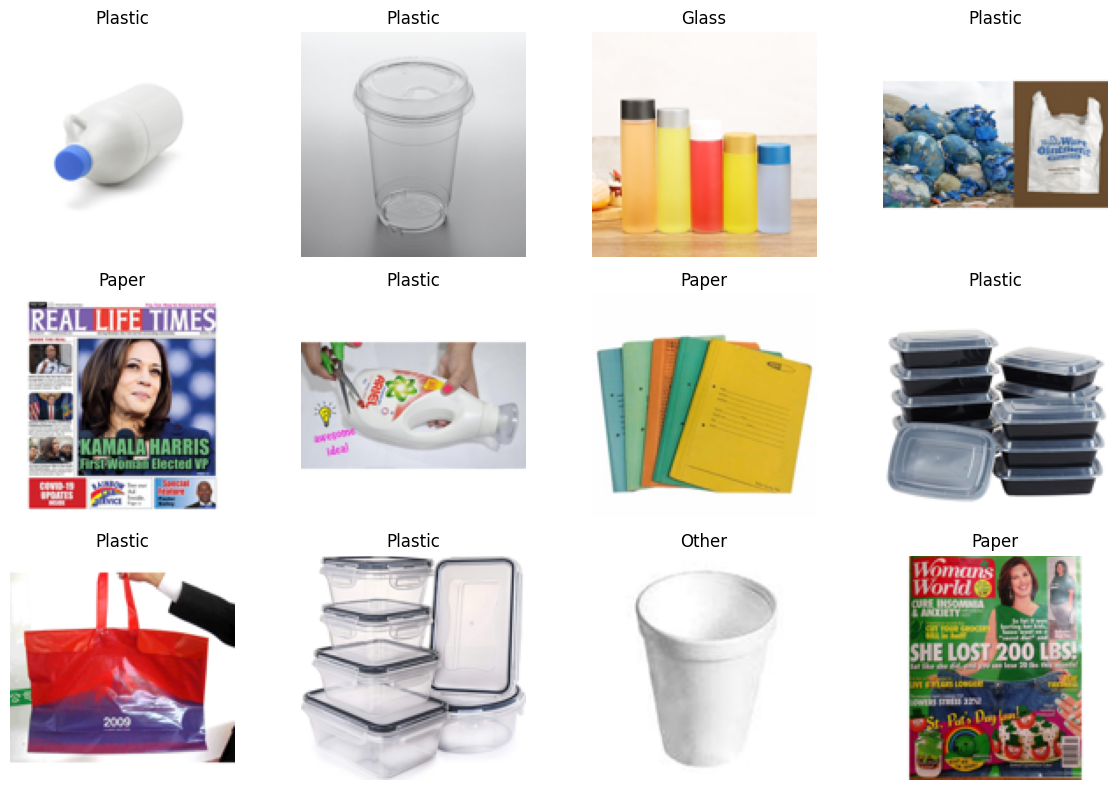

In [7]:
# Class distribution
unique_classes, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(10,6))
plt.bar(unique_classes, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

# Show some sample images
plt.figure(figsize=(12,8))
for i in range(12):
    idx = random.randint(0, len(X)-1)
    plt.subplot(3,4,i+1)
    plt.imshow(X[idx])
    plt.title(y[idx])
    plt.axis('off')
plt.tight_layout()
plt.show()


4. Preprocess the Data

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Normalize images
X = X / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

print(f"Encoded labels shape: {y_categorical.shape}")


Encoded labels shape: (7625, 7)


 5. Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y)
print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")


Training samples: 6100, Validation samples: 1525


6. Build the CNN Model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,439 (12.61 MB)

 Trainable params: 3,305,991 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

7. Train the Model

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.2537 - loss: 4.5657 - val_accuracy: 0.3082 - val_loss: 1.9199
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.3209 - loss: 2.2102 - val_accuracy: 0.3056 - val_loss: 1.8063
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.3275 - loss: 1.7954 - val_accuracy: 0.3167 - val_loss: 2.3748
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.3537 - loss: 1.6698 - val_accuracy: 0.3351 - val_loss: 1.9269
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.3683 - loss: 1.6311 - val_accuracy: 0.3941 - val_loss: 1.6336
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.3767 - loss: 1.6010 - val_accuracy: 0.3836 - val_loss: 1.6331
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.4064 - loss: 1.5071 - val_accuracy: 0.4223 - val_loss: 1.6154
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.4045 - loss: 1.4689 - val_accu

8. Evaluate the Model and Plot Curves

48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 281ms/step - accuracy: 0.4408 - loss: 3.5603
Validation Loss: 3.2347540855407715
Validation Accuracy: 0.44786885380744934


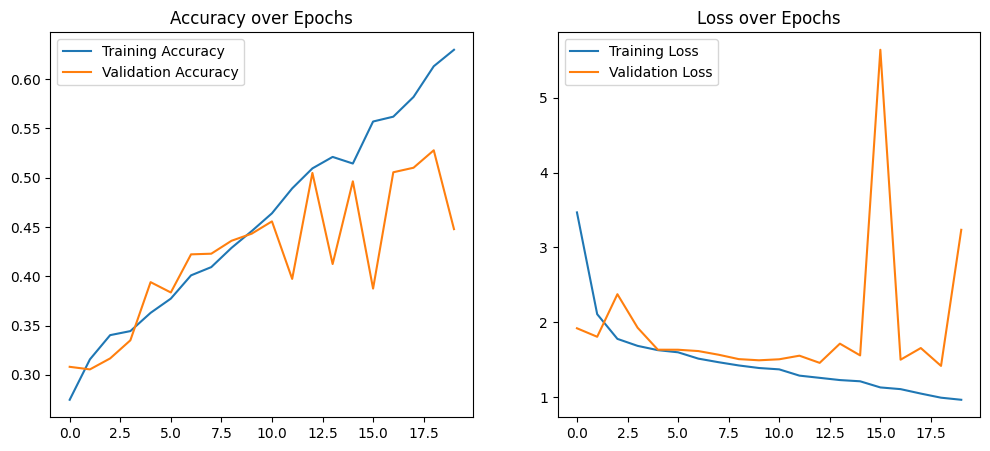

In [12]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Plot curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()


48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step
Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.83      0.23      0.36       108
  Food_Waste       0.40      0.52      0.45       200
       Glass       0.51      0.32      0.39       150
       Metal       0.63      0.13      0.22       200
       Other       0.38      0.25      0.30       202
       Paper       0.54      0.25      0.34       206
     Plastic       0.43      0.83      0.57       459

    accuracy                           0.45      1525
   macro avg       0.53      0.36      0.38      1525
weighted avg       0.50      0.45      0.41      1525



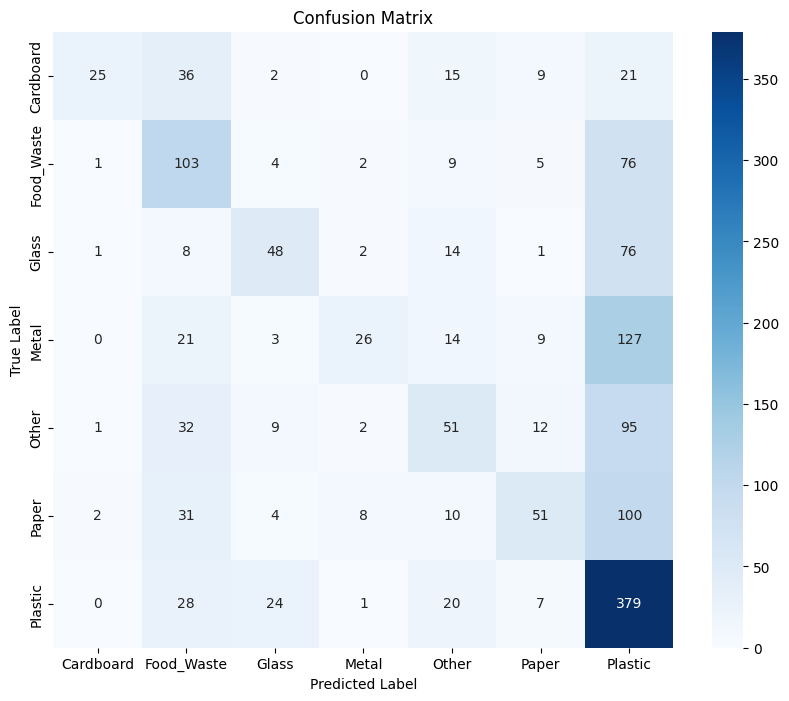

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
